In [1]:
# necessary imports.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier,RidgeClassifier,LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import mode
from sklearn.ensemble import *
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Only the following libraries will be allowed to be used in the competition:

1. NumPy
2. Pandas
3. Matplotlib
4. Scikit-learn 
5. XGBoost
6. Seaborn
7. Imblearn
8. SciPy
9. Pickle
10. regex
11. Lightgbm
12. Plotly

## Crude workflow.
1. perform EDA-cum-Dimensionaltity reduction.
2. standarsise the data if not in the first step.
3. make the models 
4. tarin the models on the data 
5. test the models 
6. then decide the best one

## Loading the data

In [2]:
train=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no


In [3]:
train_1=train.copy()

In [4]:
unique_values = {}
colns = train.select_dtypes(include=['object']).columns  

for col in colns:
    unique_values[col] = train[col].unique()  

unique_values


{'last contact date': array(['2009-04-17', '2009-10-11', '2010-11-20', ..., '2009-07-05',
        '2008-02-25', '2010-04-12'], dtype=object),
 'job': array(['blue-collar', 'technician', 'admin.', 'entrepreneur',
        'unemployed', 'management', 'services', 'student', 'self-employed',
        'retired', 'housemaid', nan], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['secondary', 'tertiary', 'primary', nan], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'telephone', nan], dtype=object),
 'poutcome': array(['other', nan, 'failure', 'success'], dtype=object),
 'target': array(['no', 'yes'], dtype=object)}

In [5]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
train['last contact date'] = pd.to_datetime(train['last contact date'])

## EDA and cleaning the data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last contact date  39211 non-null  datetime64[ns]
 1   age                39211 non-null  int64         
 2   job                38982 non-null  object        
 3   marital            39211 non-null  object        
 4   education          37744 non-null  object        
 5   default            39211 non-null  object        
 6   balance            39211 non-null  int64         
 7   housing            39211 non-null  object        
 8   loan               39211 non-null  object        
 9   contact            28875 non-null  object        
 10  duration           39211 non-null  int64         
 11  campaign           39211 non-null  int64         
 12  pdays              39211 non-null  int64         
 13  previous           39211 non-null  int64         
 14  poutco

In [8]:
train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [9]:
# Get the mode of the columns and their counts
poutcome_mode = train['poutcome'].mode()[0]
poutcome_count = (train['poutcome'] == poutcome_mode).sum()

contact_mode = train['contact'].mode()[0]
contact_count = (train['contact'] == contact_mode).sum()

education_mode = train['education'].mode()[0]
education_count = (train['education'] == education_mode).sum()

job_mode = train['job'].mode()[0]
job_count = (train['job'] == job_mode).sum()

# Print the modes and their counts
print(f"The mode of the 'poutcome' column is: {poutcome_mode} (Count: {poutcome_count})")
print(f"The mode of the 'contact' column is: {contact_mode} (Count: {contact_count})")
print(f"The mode of the 'education' column is: {education_mode} (Count: {education_count})")
print(f"The mode of the 'job' column is: {job_mode} (Count: {job_count})")


The mode of the 'poutcome' column is: failure (Count: 4949)
The mode of the 'contact' column is: cellular (Count: 25030)
The mode of the 'education' column is: secondary (Count: 19584)
The mode of the 'job' column is: blue-collar (Count: 7776)


In [10]:
train['poutcome'].fillna(poutcome_mode, inplace=True)
train['contact'].fillna(contact_mode, inplace=True)
train['education'].fillna(education_mode, inplace=True)
train['job'].fillna(job_mode, inplace=True)

/tmp/ipykernel_17/1707480272.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['poutcome'].fillna(poutcome_mode, inplace=True)
/tmp/ipykernel_17/1707480272.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [11]:
train.isna().sum()

last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
target               0
dtype: int64

In [12]:
scale=StandardScaler()
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
train[numeric_cols] = scale.fit_transform(train[numeric_cols])
# train.info()

In [13]:
# dummy train to store the encoded values
d_train=train.copy()

In [14]:
oe = OrdinalEncoder()
# onehot=OneHotEncoder()
'''cols to be encoded using oe:
1. education
2, jobs
rest all will be encoded using ohe.''' 

for i in train.columns:
    if train[i].dtype == 'object':
        # Fit and transform only the unique values of the column
        unique_values = train[i].unique().reshape(-1, 1)  # Reshape for a 2D array
        encoded_values = oe.fit_transform(unique_values)
        
        # Print the original unique values and their encoded values
        print(f"Column: {i}")
        print("Original unique values:\n", unique_values.flatten())  # Original unique values
        print("Encoded values:\n", encoded_values.flatten())  # Encoded values
        print()  # Print a new line for better separation
        
        # Assign the encoded values back to the DataFrame for the original column
        d_train[i] = oe.transform(train[[i]])

d_train.info()


Column: job
Original unique values:
 ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid']
Encoded values:
 [ 1.  9.  0.  2. 10.  4.  7.  8.  6.  5.  3.]

Column: marital
Original unique values:
 ['married' 'single' 'divorced']
Encoded values:
 [1. 2. 0.]

Column: education
Original unique values:
 ['secondary' 'tertiary' 'primary']
Encoded values:
 [1. 2. 0.]

Column: default
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

Column: housing
Original unique values:
 ['yes' 'no']
Encoded values:
 [1. 0.]

Column: loan
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

Column: contact
Original unique values:
 ['cellular' 'telephone']
Encoded values:
 [0. 1.]

Column: poutcome
Original unique values:
 ['other' 'failure' 'success']
Encoded values:
 [1. 0. 2.]

Column: target
Original unique values:
 ['no' 'yes']
Encoded values:
 [0. 1.]

<class 'pandas.core.frame.DataFrame'>
Rang

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(
/opt/conda/lib/p

In [15]:
d_train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,-1.268393,1.0,1.0,1.0,0.0,-0.292989,1.0,0.0,0.0,-0.106702,-0.314334,1.607699,-0.245271,1.0,0.0
1,2009-10-11,0.777371,9.0,1.0,1.0,0.0,-0.298732,1.0,0.0,1.0,-0.362850,-0.415446,-0.455175,-0.267926,0.0,0.0
2,2010-11-20,0.147905,1.0,1.0,1.0,0.0,-0.247159,0.0,0.0,0.0,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0
3,2009-09-01,-0.717610,0.0,1.0,1.0,0.0,-0.308448,1.0,0.0,1.0,-0.435663,-0.213222,-0.455175,-0.267926,0.0,0.0
4,2008-01-29,-0.874977,2.0,2.0,2.0,0.0,-0.324152,0.0,0.0,0.0,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,-0.874977,9.0,2.0,1.0,0.0,-0.332524,1.0,0.0,0.0,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0
39207,2009-07-31,1.328153,0.0,1.0,0.0,0.0,0.045537,0.0,0.0,0.0,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0
39208,2008-06-02,-0.481561,1.0,1.0,1.0,0.0,-0.328674,1.0,0.0,0.0,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0
39209,2010-03-20,-1.111027,8.0,2.0,1.0,0.0,0.028977,0.0,0.0,0.0,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0


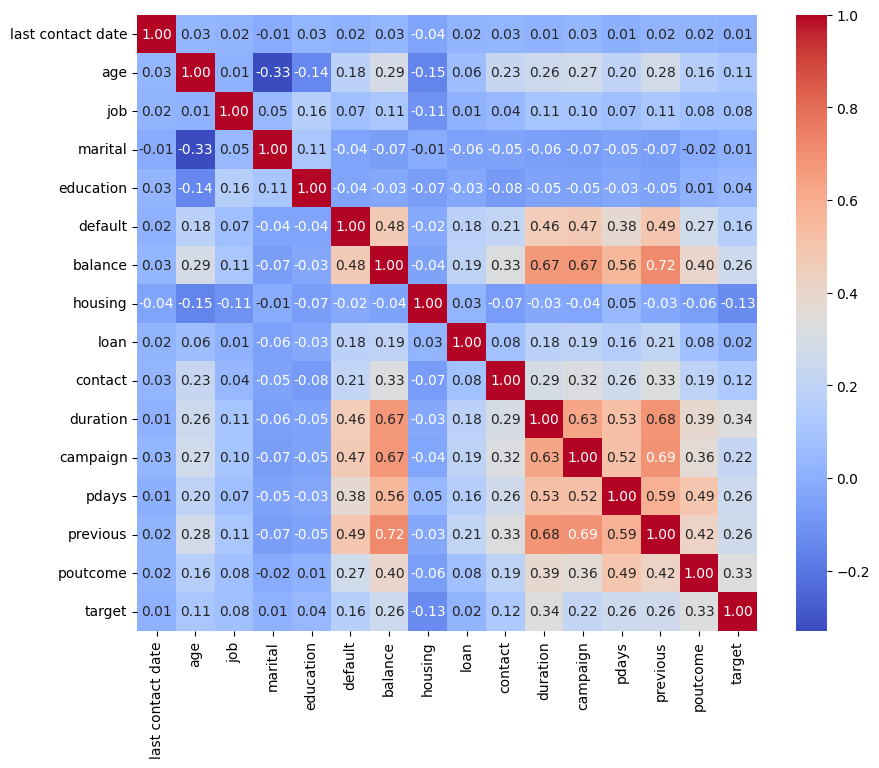

In [16]:
corr=d_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [17]:
# droping it so as to remove the negatively correlated column, and the ones with very low correlation
train.drop('housing',inplace=True,axis=1)
train.drop(['last contact date','marital','loan'],inplace=True,axis=1)

In [18]:
target_col = 'target'  

ordinal_cols = ['education', 'job']
oe = OrdinalEncoder()
train[ordinal_cols] = oe.fit_transform(train[ordinal_cols])

ohe = OneHotEncoder(sparse=False, drop='first')
remaining_cols = [col for col in train.columns if col not in ordinal_cols and col != target_col and train[col].dtype == 'object']

ohe_encoded = pd.DataFrame(ohe.fit_transform(train[remaining_cols]), columns=ohe.get_feature_names_out(remaining_cols))

train.drop(columns=remaining_cols, inplace=True)
train = pd.concat([train.drop(columns=[target_col]), ohe_encoded], axis=1)

train = pd.concat([train, d_train[[target_col]]], axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                39211 non-null  float64
 1   job                39211 non-null  float64
 2   education          39211 non-null  float64
 3   balance            39211 non-null  float64
 4   duration           39211 non-null  float64
 5   campaign           39211 non-null  float64
 6   pdays              39211 non-null  float64
 7   previous           39211 non-null  float64
 8   default_yes        39211 non-null  float64
 9   contact_telephone  39211 non-null  float64
 10  poutcome_other     39211 non-null  float64
 11  poutcome_success   39211 non-null  float64
 12  target             39211 non-null  float64
dtypes: float64(13)
memory usage: 3.9 MB


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
train

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success,target
0,-1.268393,1.0,1.0,-0.292989,-0.106702,-0.314334,1.607699,-0.245271,0.0,0.0,1.0,0.0,0.0
1,0.777371,9.0,1.0,-0.298732,-0.362850,-0.415446,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
2,0.147905,1.0,1.0,-0.247159,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
3,-0.717610,0.0,1.0,-0.308448,-0.435663,-0.213222,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
4,-0.874977,2.0,2.0,-0.324152,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,-0.874977,9.0,1.0,-0.332524,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39207,1.328153,0.0,0.0,0.045537,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39208,-0.481561,1.0,1.0,-0.328674,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39209,-1.111027,8.0,1.0,0.028977,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0


In [20]:
train_cleaned=train.copy()

# encoding to see the plots.
oe = OrdinalEncoder()
# onehot=OneHotEncoder()
for i in train.columns:
    if train[i].dtype == 'object':
        # Fit and transform only the unique values of the column
        unique_values = train[i].unique().reshape(-1, 1)  # Reshape for a 2D array
        encoded_values = oe.fit_transform(unique_values)
        
        # Print the original unique values and their encoded values
        print(f"Column: {i}")
        print("Original unique values:\n", unique_values.flatten())  # Original unique values
        print("Encoded values:\n", encoded_values.flatten())  # Encoded values
        print()  # Print a new line for better separation
        
        # Assign the encoded values back to the DataFrame for the original column
        d_Train[i] = oe.transform(train[[i]])

d_Train.info()

## want to make a pipeline that would give the best feature.

## general pipeline 
```python
preprocessor = ColumnTransformer(
    transformers=[
        ('mean_imputer', SimpleImputer(strategy='mean'), impute_cols),
        ('scaler', StandardScaler(), scaler_cols),
        ('ordinalEncoder', OrdinalEncoder(), onehot_cols)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('sfs', SequentialFeatureSelector(LogisticRegression(), n_features_to_select=2, direction='backward')), #sfs or rfe dependign on 
    ('logreg', LogisticRegression())
])
```

**filling the missing values wiht the mode of the categoracal variables**

columns_to_impute = ['poutcome', 'contact', 'education', 'job']

for column in columns_to_impute:
    mode_value = train[column].mode()[0]
    train[column].fillna(mode_value, inplace=True)
    print(f"Filled missing values in '{column}' with mode: {mode_value} (Count: {(train[column] == mode_value).sum()})")

we can conder constructing a CI to determine which features to keep and which to discard 

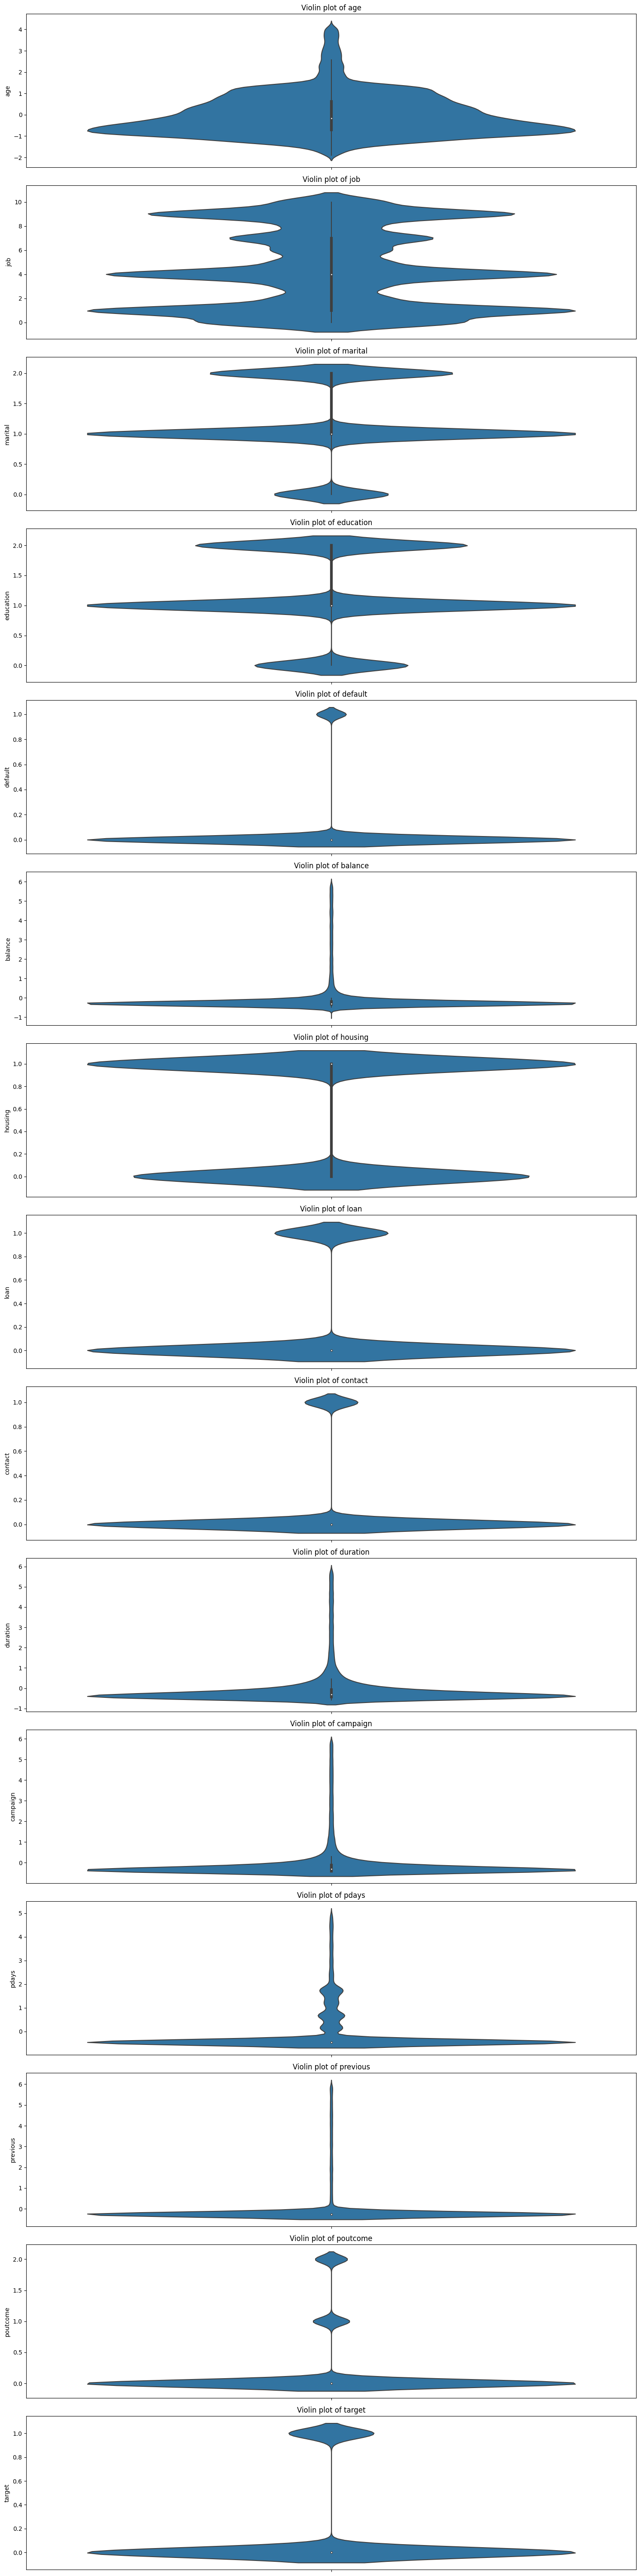

In [21]:
# violin plots
num_cols = d_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.violinplot(data=d_train, y=col)
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()


- the majority of tragets are 0s, which would cause class imbalance (svm could help here)

In [22]:
d_train

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,-1.268393,1.0,1.0,1.0,0.0,-0.292989,1.0,0.0,0.0,-0.106702,-0.314334,1.607699,-0.245271,1.0,0.0
1,2009-10-11,0.777371,9.0,1.0,1.0,0.0,-0.298732,1.0,0.0,1.0,-0.362850,-0.415446,-0.455175,-0.267926,0.0,0.0
2,2010-11-20,0.147905,1.0,1.0,1.0,0.0,-0.247159,0.0,0.0,0.0,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0
3,2009-09-01,-0.717610,0.0,1.0,1.0,0.0,-0.308448,1.0,0.0,1.0,-0.435663,-0.213222,-0.455175,-0.267926,0.0,0.0
4,2008-01-29,-0.874977,2.0,2.0,2.0,0.0,-0.324152,0.0,0.0,0.0,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,2008-07-31,-0.874977,9.0,2.0,1.0,0.0,-0.332524,1.0,0.0,0.0,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0
39207,2009-07-31,1.328153,0.0,1.0,0.0,0.0,0.045537,0.0,0.0,0.0,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0
39208,2008-06-02,-0.481561,1.0,1.0,1.0,0.0,-0.328674,1.0,0.0,0.0,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0
39209,2010-03-20,-1.111027,8.0,2.0,1.0,0.0,0.028977,0.0,0.0,0.0,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0


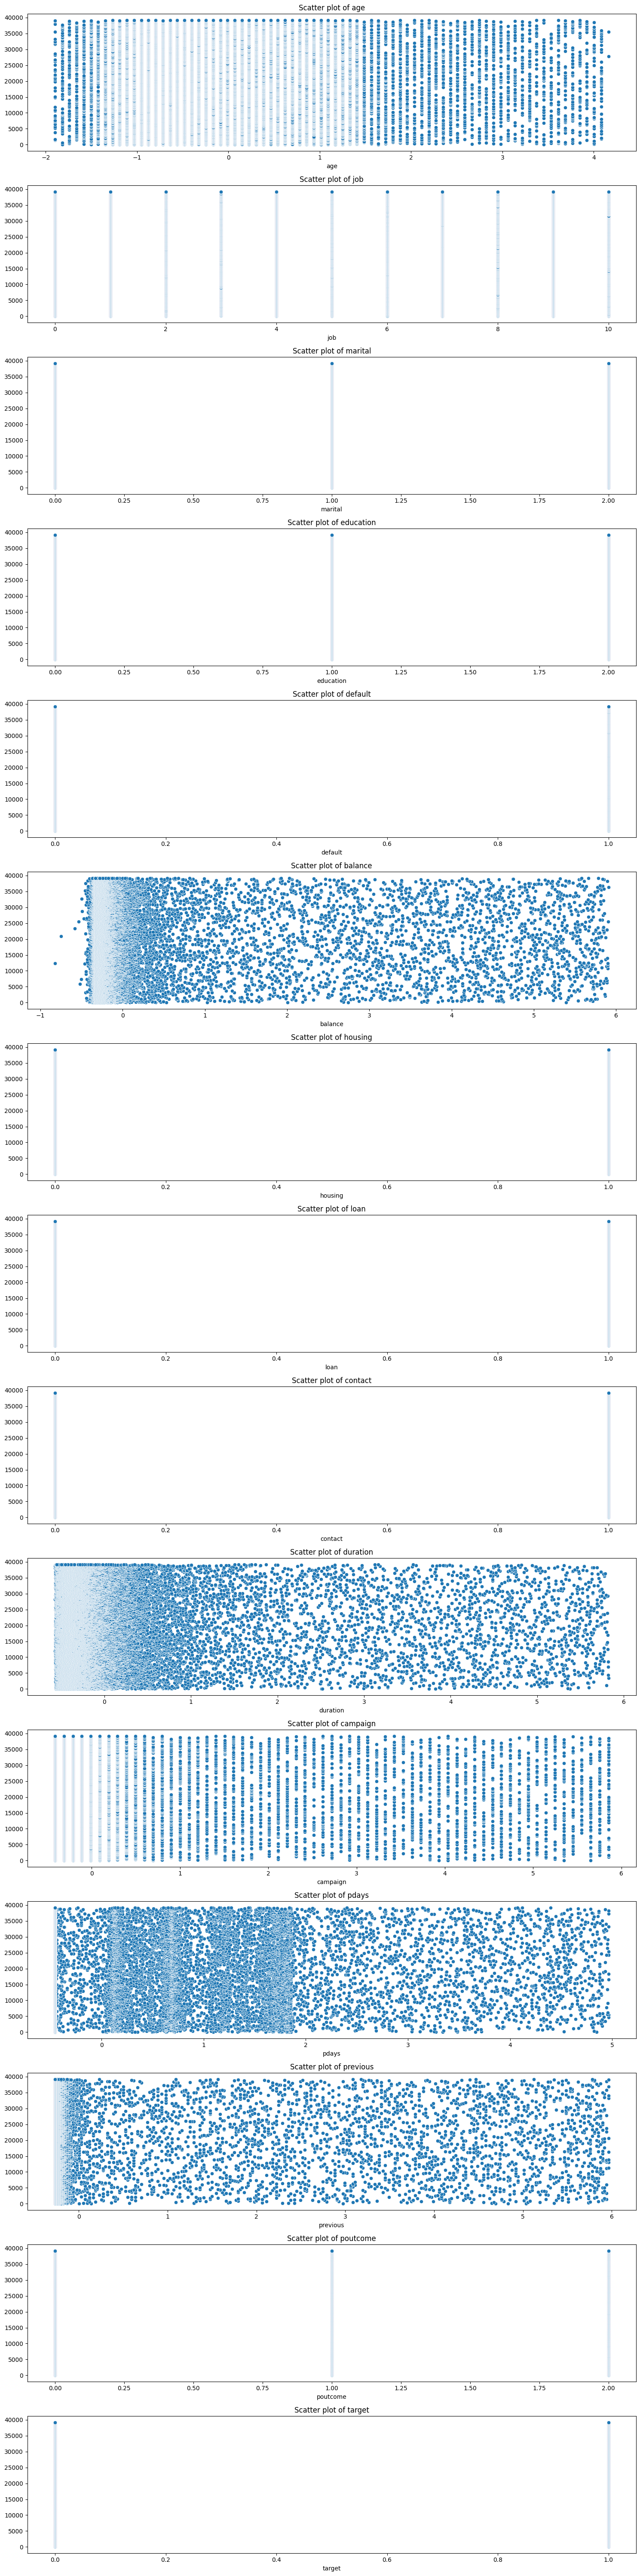

In [23]:
num_cols = d_train.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.scatterplot(data=d_train, x=col, y=d_train.index)  
    plt.title(f'Scatter plot of {col}')

plt.tight_layout()
plt.show()


In [24]:
# def remove_outliers(df, columns):
#     for col in columns:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1

#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#         # Cap any negative values at 0
#         df[col] = df[col].apply(lambda x: max(x, 0))
    
#     return df

# num_cols = train.select_dtypes(include=['int64']).columns.tolist()
# # num_cols.remove('previous')

# train_cleaned = remove_outliers(train, num_cols)
# train_cleaned.reset_index(drop=True, inplace=True)
# train_cleaned.info()


In [25]:
train_cleaned=train.copy()

In [26]:
train_cleaned

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success,target
0,-1.268393,1.0,1.0,-0.292989,-0.106702,-0.314334,1.607699,-0.245271,0.0,0.0,1.0,0.0,0.0
1,0.777371,9.0,1.0,-0.298732,-0.362850,-0.415446,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
2,0.147905,1.0,1.0,-0.247159,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
3,-0.717610,0.0,1.0,-0.308448,-0.435663,-0.213222,-0.455175,-0.267926,0.0,1.0,0.0,0.0,0.0
4,-0.874977,2.0,2.0,-0.324152,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,-0.874977,9.0,1.0,-0.332524,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39207,1.328153,0.0,0.0,0.045537,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39208,-0.481561,1.0,1.0,-0.328674,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0
39209,-1.111027,8.0,1.0,0.028977,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0,0.0,0.0,0.0


the dataset now only contains clean and complete and only contains the columns that are positively correlated to the target. 

# - the dataset still looks very random, so a decision tree or random forest regressor might work best for capturing the parameteres
- can try svm 

## TTS

In [27]:
X = train_cleaned.drop('target', axis=1)
y = train_cleaned['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Baseline model

In [28]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## predictions and testing

In [29]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Cross-validation to get an average performance score
cross_val = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Cross-Validation Accuracy: {cross_val.mean():.4f}")

Accuracy: 0.8599
Precision: 0.5718
Recall: 0.3289
F1 Score: 0.4176
Confusion Matrix:
[[6350  295]
 [ 804  394]]
Cross-Validation Accuracy: 0.8683


In [30]:
test=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
test

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2010-11-20,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN
9996,2009-06-03,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN
9997,2010-04-20,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN
9998,2010-02-17,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN


In [31]:
test.isna().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

job, education, contact, poutcome

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [33]:
test.drop(['last contact date','marital','loan','housing'],inplace=True,axis=1)

In [34]:
test

,age,job,education,default,balance,contact,duration,campaign,pdays,previous,poutcome
0,36,management,tertiary,no,7,NaN,20,1,-1,0,NaN
1,30,unemployed,tertiary,no,1067,cellular,78,2,-1,0,NaN
2,32,blue-collar,secondary,no,82,cellular,86,4,-1,0,NaN
3,38,admin.,primary,no,1487,NaN,332,2,-1,0,NaN
4,59,management,tertiary,no,315,cellular,591,1,176,2,failure
...,...,...,...,...,...,...,...,...,...,...,...
9995,38,management,tertiary,no,8953,cellular,301,1,-1,0,NaN
9996,26,admin.,secondary,no,317,NaN,953,1,-1,0,NaN
9997,26,technician,secondary,no,181,cellular,158,2,-1,0,NaN
9998,32,management,tertiary,no,312,cellular,232,2,-1,0,NaN


In [35]:
# Get the mode of the columns and their counts
poutcome_mode = test['poutcome'].mode()[0]
poutcome_count = (test['poutcome'] == poutcome_mode).sum()

contact_mode = test['contact'].mode()[0]
contact_count = (test['contact'] == contact_mode).sum()

education_mode = test['education'].mode()[0]
education_count = (test['education'] == education_mode).sum()

job_mode = test['job'].mode()[0]
job_count = (test['job'] == job_mode).sum()

# Print the modes and their counts
print(f"The mode of the 'poutcome' column is: {poutcome_mode} (Count: {poutcome_count})")
print(f"The mode of the 'contact' column is: {contact_mode} (Count: {contact_count})")
print(f"The mode of the 'education' column is: {education_mode} (Count: {education_count})")
print(f"The mode of the 'job' column is: {job_mode} (Count: {job_count})")


The mode of the 'poutcome' column is: failure (Count: 1231)
The mode of the 'contact' column is: cellular (Count: 6295)
The mode of the 'education' column is: secondary (Count: 4960)
The mode of the 'job' column is: management (Count: 1996)


In [36]:
test['poutcome'].fillna(poutcome_mode, inplace=True)
test['contact'].fillna(contact_mode, inplace=True)
test['education'].fillna(education_mode, inplace=True)
test['job'].fillna(job_mode, inplace=True)

/tmp/ipykernel_17/500965581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['poutcome'].fillna(poutcome_mode, inplace=True)
/tmp/ipykernel_17/500965581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [37]:
numeric_cols = test.select_dtypes(include=['float64', 'int64']).columns
test[numeric_cols] = scale.fit_transform(test[numeric_cols])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10000 non-null  float64
 1   job        10000 non-null  object 
 2   education  10000 non-null  object 
 3   default    10000 non-null  object 
 4   balance    10000 non-null  float64
 5   contact    10000 non-null  object 
 6   duration   10000 non-null  float64
 7   campaign   10000 non-null  float64
 8   pdays      10000 non-null  float64
 9   previous   10000 non-null  float64
 10  poutcome   10000 non-null  object 
dtypes: float64(6), object(5)
memory usage: 859.5+ KB


In [38]:
ordinal_cols = ['education', 'job']
oe = OrdinalEncoder()
test[ordinal_cols] = oe.fit_transform(test[ordinal_cols])

ohe = OneHotEncoder(sparse=False, drop='first')
remaining_cols = [col for col in test.columns if col not in ordinal_cols and test[col].dtype == 'object']

ohe_encoded = pd.DataFrame(ohe.fit_transform(test[remaining_cols]), columns=ohe.get_feature_names_out(remaining_cols))

test.drop(columns=remaining_cols, inplace=True)
test = pd.concat([test, ohe_encoded], axis=1)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10000 non-null  float64
 1   job                10000 non-null  float64
 2   education          10000 non-null  float64
 3   balance            10000 non-null  float64
 4   duration           10000 non-null  float64
 5   campaign           10000 non-null  float64
 6   pdays              10000 non-null  float64
 7   previous           10000 non-null  float64
 8   default_yes        10000 non-null  float64
 9   contact_telephone  10000 non-null  float64
 10  poutcome_other     10000 non-null  float64
 11  poutcome_success   10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
test

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success
0,-0.494976,4.0,2.0,-0.333785,-0.547978,-0.416995,-0.453373,-0.270508,0.0,0.0,0.0,0.0
1,-0.969303,10.0,2.0,-0.267302,-0.471782,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0
2,-0.811194,1.0,1.0,-0.329081,-0.461272,-0.116256,-0.453373,-0.270508,0.0,0.0,0.0,0.0
3,-0.336867,0.0,0.0,-0.240959,-0.138096,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0
4,1.323277,4.0,2.0,-0.314467,0.202159,-0.416995,0.650351,-0.225528,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.336867,4.0,2.0,0.227312,-0.178821,-0.416995,-0.453373,-0.270508,0.0,0.0,0.0,0.0
9996,-1.285521,0.0,1.0,-0.314342,0.677727,-0.416995,-0.453373,-0.270508,0.0,0.0,0.0,0.0
9997,-1.285521,9.0,1.0,-0.322872,-0.366684,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0
9998,-0.811194,4.0,2.0,-0.314656,-0.269468,-0.316748,-0.453373,-0.270508,0.0,0.0,0.0,0.0


In [40]:
test.isna().sum()

age                  0
job                  0
education            0
balance              0
duration             0
campaign             0
pdays                0
previous             0
default_yes          0
contact_telephone    0
poutcome_other       0
poutcome_success     0
dtype: int64

In [41]:
pred_test=model.predict(test)
submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test
})

# Save the DataFrame as a CSV file
submission.to_csv('/kaggle/working/submission_milestone1.csv', index=False)

print("Submission file saved!")

Submission file saved!


# Milestone 2

## SGD Classifier

In [42]:
# tunning the hyperparameters
# X_train=
sgd=SGDClassifier()
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100], 'max_iter':[1000,10000,100000]}
clf = GridSearchCV(sgd, parameters)
clf.fit(X_train, y_train)
best_params=clf.best_params_

sgd_best = SGDClassifier(alpha=best_params['alpha'], max_iter=best_params['max_iter'])
sgd_best.fit(X_train, y_train)

y_pred=sgd_best.predict(X_test)
# bias term
# print(sgd_best.intercept_)
# weights
# print(sgd_best.coef_)

In [43]:
# evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# printing them
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8575800076501339
Precision: 0.8317896001219298
Recall: 0.8575800076501339
F1 Score: 0.8331977773518717
Confusion Matrix:
[[6423  222]
 [ 895  303]]


# ridge classifier

In [44]:
rc=RidgeClassifier()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[1000,10000,100000]}
clf = GridSearchCV(rc, parameters)
clf.fit(X_train, y_train)
best_params = clf.best_params_
# tunning the hyperparameters.
ridge_best = RidgeClassifier(alpha=best_params['alpha'],max_iter=best_params['max_iter'])
ridge_best.fit(X_train, y_train)

y_pred = ridge_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8504398826979472
Precision: 0.8155497597025181
Recall: 0.8504398826979472
F1 Score: 0.8158101139002335
Confusion Matrix:
[[6469  176]
 [ 997  201]]


# logistic regression

In [45]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8518424072421268
Precision: 0.8196187831244158
Recall: 0.8518424072421268
F1 Score: 0.8206945158514461
Confusion Matrix:
[[6450  195]
 [ 967  231]]


In [47]:
pred_test=sgd_best.predict(test)
pred_test_labels = np.where(pred_test == 1, 'yes', 'no')

submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test_labels
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file saved!")


Submission file saved!


In [48]:
len(pred_test)

10000

In [49]:
sb=pd.read_csv(r'/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv')

In [50]:
sb

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes
...,...,...
9995,9995,yes
9996,9996,no
9997,9997,no
9998,9998,no


In [51]:
pred_test_labels

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

# milestone 3
Dimensionality Reduction

Feature Selection

Retrain the models


Naive Bayes

Nearest Neighbors

Support Vector Machines

In [52]:
X

,age,job,education,balance,duration,campaign,pdays,previous,default_yes,contact_telephone,poutcome_other,poutcome_success
0,-1.268393,1.0,1.0,-0.292989,-0.106702,-0.314334,1.607699,-0.245271,0.0,0.0,1.0,0.0
1,0.777371,9.0,1.0,-0.298732,-0.362850,-0.415446,-0.455175,-0.267926,0.0,1.0,0.0,0.0
2,0.147905,1.0,1.0,-0.247159,-0.147009,-0.415446,-0.455175,-0.267926,0.0,0.0,0.0,0.0
3,-0.717610,0.0,1.0,-0.308448,-0.435663,-0.213222,-0.455175,-0.267926,0.0,1.0,0.0,0.0
4,-0.874977,2.0,2.0,-0.324152,0.007720,-0.314334,-0.455175,-0.267926,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39206,-0.874977,9.0,1.0,-0.332524,-0.550085,2.921249,-0.455175,-0.267926,0.0,0.0,0.0,0.0
39207,1.328153,0.0,0.0,0.045537,-0.422661,-0.112110,-0.455175,-0.267926,0.0,0.0,0.0,0.0
39208,-0.481561,1.0,1.0,-0.328674,-0.498075,0.292338,-0.455175,-0.267926,0.0,0.0,0.0,0.0
39209,-1.111027,8.0,1.0,0.028977,-0.449966,-0.010998,-0.455175,-0.267926,0.0,0.0,0.0,0.0


In [53]:
# Define a pipeline with PCA and soem model
def create_pipe(model):
    pipeline = Pipeline([
        ('pca', PCA()), 
        ('clf', model)
        ])
    
    return pipeline

# performing dimensionality red
# need to use grid search cv here.
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
X_pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
explained_variance = pca.explained_variance_ratio_

print(X_pca_df.head())  
print(f'Explained Variance Ratio: {explained_variance}')
print(f'Total Explained Variance: {sum(explained_variance)}')

write grid seracg cv for this 

new_train=pd.concat([X_pca_df,train['target']],axis=1)

new_train

# retraining the models

X = new_train.drop('target', axis=1)
y = new_train['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision tree

In [54]:
model=DecisionTreeClassifier()
# model.fit(x_train, y_train)

# Define the parameter grid
param_grid = {
    'pca__n_components': [5, 6, 7, 8, 9, 10],  
    'clf__max_depth': [3, 4, 5, 6, 10],        
    'clf__min_samples_split': [2, 5, 10],      
    'clf__min_samples_leaf': [1, 2, 4],        
    'clf__criterion': ['gini', 'entropy']      
}
pipeline=create_pipe(model)
# Set up the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model
grid_search.fit(X, y)

# Print best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

y_pred_pca = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_pca)

# Precision
precision = precision_score(y_test, y_pred_pca)

# Recall
recall = recall_score(y_test, y_pred_pca)

# F1 Score
f1 = f1_score(y_test, y_pred_pca)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Cross-validation to get an average performance score
cross_val = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Cross-Validation Accuracy: {cross_val.mean():.4f}")

### decsion tree

In [55]:
param_grid = {
    'pca__n_components': [5, 6, 7, 8, 9, 10],  
    'clf__max_depth': [3, 4, 5, 6]
    # 'clf__min_samples_split': [2, 5, 10],      
    # 'clf__min_samples_leaf': [1, 2, 4],        
    # 'clf__criterion': ['gini', 'entropy']      
}

pipeline = create_pipe(model)
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

y_pred_pca = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_pca)
precision = precision_score(y_test, y_pred_pca)
recall = recall_score(y_test, y_pred_pca)
f1 = f1_score(y_test, y_pred_pca)
conf_matrix = confusion_matrix(y_test, y_pred_pca)

cross_val = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Cross-Validation Accuracy: {cross_val.mean():.4f}")


Best Parameters: {'clf__max_depth': 6, 'pca__n_components': 10}
Best Cross-Validation Score: 0.8667750088027985
Accuracy: 0.8605
Precision: 0.5571
Recall: 0.4232
F1 Score: 0.4810
Confusion Matrix:
[[6242  403]
 [ 691  507]]
Cross-Validation Accuracy: 0.8668


## SGD

In [56]:
sgd = SGDClassifier()
parameters = {'pca__n_components': [5, 6, 7, 8, 9, 10],
              'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'clf__max_iter': [1000, 10000, 100000]}

pipeline = create_pipe(sgd)
clf = GridSearchCV(pipeline, parameters)
clf.fit(X_train, y_train)

best_params = clf.best_params_

y_pred = clf.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.847252326915721
Precision: 0.8189345836012393
Recall: 0.847252326915721
F1 Score: 0.825548287050934
Confusion Matrix:
[[6341  304]
 [ 894  304]]


## Ridge classifier

In [57]:
rc=RidgeClassifier()

# parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[1000,10000,100000]}
parameters = {'pca__n_components': [5, 6, 7, 8, 9, 10],
              'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'clf__max_iter': [1000, 10000, 100000]}
pipeline = create_pipe(rc)
clf = GridSearchCV(pipeline, parameters)
clf.fit(X_train, y_train)
# clf = GridSearchCV(rc, parameters)
# clf.fit(X_train, y_train)
best_params = clf.best_params_
# tunning the hyperparameters.
# ridge_best_pca = RidgeClassifier(alpha=best_params['alpha'],max_iter=best_params['max_iter'])
# ridge_best_pca.fit(x_train, y_train)
best_params = clf.best_params_

y_pred = clf.best_estimator_.predict(X_test)

# y_pred = ridge_best_pca.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8478898380721662
Precision: 0.8089857324969197
Recall: 0.8478898380721662
F1 Score: 0.8101454593077256
Confusion Matrix:
[[6477  168]
 [1025  173]]


## logistic regression

In [58]:
log_reg = LogisticRegression()
parameters = {'pca__n_components': [5, 6, 7, 8, 9, 10],
              # 'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'clf__max_iter': [1000, 10000, 100000],
              'clf__penalty': ['l1', 'l2', 'elasticnet'],
              'clf__solver': ['lbfgs', 'saga', 'liblinear']  # Solvers for different penalties

}
pipeline = create_pipe(log_reg)
clf = GridSearchCV(pipeline, parameters)
clf.fit(X_train, y_train)
# log_reg.fit(x_train, y_train)
best_params = clf.best_params_
y_pred = clf.best_estimator_.predict(X_test)
# y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)

Accuracy: 0.8482723447660334
Precision: 0.8095774452469722
Recall: 0.8482723447660334
F1 Score: 0.8101184645002037
Confusion Matrix:
[[6482  163]
 [1027  171]]


## making a pipeline to select the most important features, cause pca is not surpassing the previously attained results

scaler_cols = train_1.select_dtypes(include=['int64', 'float64']).columns
ordinal_cols = ['education', 'job'.'target']
onehot_cols = [col for col in train_1.columns if col not in ordinal_cols + ['job', 'education', 'poutcome', 'contact']]
impute_cols = ['job', 'education', 'poutcome', 'contact']


preprocessor = ColumnTransformer(
    transformers=[
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), impute_cols),
        ('scaler', StandardScaler(), scaler_cols),
        ('ordinalEncoder', OrdinalEncoder(), ordinal_cols),
        ('onehotEncoder', OneHotEncoder(drop='first'), onehot_cols)
    ]
)

def create_pipeline(classifier,criteria):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('frommodel', SelectFromModel(classifier,criteria)),
        ('classifier', classifier)
    ])


# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('sfs', SequentialFeatureSelector(LogisticRegression(), n_features_to_select=2, direction='backward')), #sfs or rfe dependign on the purpose.
#     ('logreg', LogisticRegression())
# ])

def create_feature_selection_pipeline(classifier_name, selection_method='sfm', n_features_to_select=10):
    scaler_cols = train_1.select_dtypes(include=['int64', 'float64']).columns
    ordinal_cols = ['education', 'job', 'target']
    onehot_cols = [col for col in train_1.columns 
                   if col not in ordinal_cols + ['job', 'education', 'poutcome', 'contact']]
    impute_cols = ['job', 'education', 'poutcome', 'contact']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('mode_imputer', SimpleImputer(strategy='most_frequent'), impute_cols),
            ('scaler', StandardScaler(), scaler_cols),
            ('ordinalEncoder', OrdinalEncoder(), ordinal_cols),
            ('onehotEncoder', OneHotEncoder(drop='first'), onehot_cols)
        ]
    )
    
    classifiers = {
        'svm': SVC(kernel='linear', probability=True),
        'sgd': SGDClassifier(max_iter=1000, random_state=42),
        'ridge': RidgeClassifier(),
        'logreg': LogisticRegression(),
        'dtree': DecisionTreeClassifier(),
        'nb': GaussianNB()
    }
    
    classifier = classifiers.get(classifier_name.lower())
    if not classifier:
        raise ValueError(f"Invalid classifier name. Choose from: {list(classifiers.keys())}")
    
    if selection_method.lower() == 'rfe':
        base_estimator = LogisticRegression() if isinstance(classifier, GaussianNB) else classifier
        selector = RFE(estimator=base_estimator, n_features_to_select=n_features_to_select, step=1)
    elif selection_method.lower() == 'sfs':
        base_estimator = LogisticRegression() if isinstance(classifier, GaussianNB) else classifier
        selector = SequentialFeatureSelector(estimator=base_estimator, n_features_to_select=n_features_to_select, direction='forward')
    elif selection_method.lower() == 'sfm':
        base_estimator = LogisticRegression() if isinstance(classifier, GaussianNB) else classifier
        selector = SelectFromModel(estimator=base_estimator, max_features=n_features_to_select)
    else:
        raise ValueError("Invalid selection method. Choose from: 'rfe', 'sfs', 'sfm'")
    
    return Pipeline([
        ('preprocessor', preprocessor),
        ('selector', selector),
        ('classifier', classifier)
    ])


python
```
def run_feature_selection_comparison(X_train, y_train, X_test, y_test):
    results = {}
    classifiers = ['svm', 'sgd', 'ridge', 'logreg', 'dtree', 'nb']
    selection_methods = ['rfe', 'sfs', 'sfm']
    
    for clf in classifiers:
        results[clf] = {}
        for method in selection_methods:
            try:
                pipeline = create_feature_selection_pipeline(
                    classifier_name=clf,
                    selection_method=method,
                    n_features_to_select=10
                )
                pipeline.fit(X_train, y_train)
                score = pipeline.score(X_test, y_test)
                results[clf][method] = score
            except Exception as e:
                results[clf][method] = f"Error: {str(e)}"
    
    return results
```

## SVM

In [59]:
# svm on old dataset
svm_classifier = SVC()  
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8568149942623996
Precision: 0.832659828021657
Recall: 0.8568149942623996
F1 Score: 0.8363264962074248
Confusion Matrix:
[[6380  265]
 [ 858  340]]


## naive bayes

In [60]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f'Accuracy: {accuracy_nb}')
print(f'Precision: {precision_nb}')
print(f'Recall: {recall_nb}')
print(f'F1 Score: {f1_nb}')
print(f'Confusion Matrix:\n{conf_matrix_nb}')


Accuracy: 0.8485273492286115
Precision: 0.8373291793499372
Recall: 0.8485273492286115
F1 Score: 0.8419719649424059
Confusion Matrix:
[[6163  482]
 [ 706  492]]


# clustering

In [61]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

y_kmeans = kmeans.predict(X_test)

def get_mapped_labels(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(3):  # Assuming 3 clusters
        mask = (y_pred == i)
        if np.any(mask):  # Check if the mask has any true values
            labels[mask] = mode(y_true[mask])[0]
    return labels

mapped_labels = get_mapped_labels(y_test, y_kmeans)

accuracy = accuracy_score(y_test, mapped_labels)
conf_matrix = confusion_matrix(y_test, mapped_labels)
precision = precision_score(y_test, mapped_labels, average='weighted')
recall = recall_score(y_test, mapped_labels, average='weighted')
f1 = f1_score(y_test, mapped_labels, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.847252326915721
Confusion Matrix:
[[6645    0]
 [1198    0]]
Precision: 0.7178365054641038
Recall: 0.847252326915721
F1 Score: 0.7771937758634685


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## submitting prediction via naive bayes.

In [62]:
pred_test=nb_classifier.predict(test)
pred_test_labels = np.where(pred_test == 1, 'yes', 'no')

submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test_labels
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file saved!")


Submission file saved!


## Milestone 4


making:
1. Ensemble (Bagging, Boosting, Stacking)
2. Multi-layer Perceptron

In [63]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'logloss'
}

model_xgb = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])
y_pred_xgb = model_xgb.predict(dtest)

y_pred_xgb = model_xgb.predict(dtest)
# metrics
y_pred_xgb_binary = [1 if pred > 0.5 else 0 for pred in y_pred_xgb]
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)
precision_xgb = precision_score(y_test, y_pred_xgb_binary)
recall_xgb = recall_score(y_test, y_pred_xgb_binary)
f1_xgb = f1_score(y_test, y_pred_xgb_binary)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_binary)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")
print(f"XGBoost Confusion Matrix:\n{conf_matrix_xgb}")

[0]	test-logloss:0.40989
[1]	test-logloss:0.39135
[2]	test-logloss:0.37619
[3]	test-logloss:0.36372
[4]	test-logloss:0.35346
[5]	test-logloss:0.34485
[6]	test-logloss:0.33736
[7]	test-logloss:0.33097
[8]	test-logloss:0.32545
[9]	test-logloss:0.32082
[10]	test-logloss:0.31663
[11]	test-logloss:0.31313
[12]	test-logloss:0.31006
[13]	test-logloss:0.30751
[14]	test-logloss:0.30527
[15]	test-logloss:0.30335
[16]	test-logloss:0.30124
[17]	test-logloss:0.29955
[18]	test-logloss:0.29805
[19]	test-logloss:0.29686
[20]	test-logloss:0.29590
[21]	test-logloss:0.29477
[22]	test-logloss:0.29394
[23]	test-logloss:0.29313
[24]	test-logloss:0.29250
[25]	test-logloss:0.29188
[26]	test-logloss:0.29127
[27]	test-logloss:0.29083
[28]	test-logloss:0.29048
[29]	test-logloss:0.28999
[30]	test-logloss:0.28969
[31]	test-logloss:0.28949
[32]	test-logloss:0.28927
[33]	test-logloss:0.28892
[34]	test-logloss:0.28883
[35]	test-logloss:0.28863
[36]	test-logloss:0.28838
[37]	test-logloss:0.28828
[38]	test-logloss:0.28

In [64]:
# lightgbm model
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'binary',  
    'metric': 'binary_logloss',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

model_lgb = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

y_pred_lgb = model_lgb.predict(X_test)
y_pred_lgb_binary = [1 if pred > 0.5 else 0 for pred in y_pred_lgb]

accuracy_lgb = accuracy_score(y_test, y_pred_lgb_binary)
precision_lgb = precision_score(y_test, y_pred_lgb_binary)
recall_lgb = recall_score(y_test, y_pred_lgb_binary)
f1_lgb = f1_score(y_test, y_pred_lgb_binary)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb_binary)

# Print metrics
print(f"LightGBM Accuracy: {accuracy_lgb}")
print(f"LightGBM Precision: {precision_lgb}")
print(f"LightGBM Recall: {recall_lgb}")
print(f"LightGBM F1 Score: {f1_lgb}")
print(f"LightGBM Confusion Matrix:\n{conf_matrix_lgb}")


[LightGBM] [Info] Number of positive: 4629, number of negative: 26739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1172
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147571 -> initscore=-1.753782
[LightGBM] [Info] Start training from score -1.753782
LightGBM Accuracy: 0.8617875812826724
LightGBM Precision: 0.5653669724770642
LightGBM Recall: 0.41151919866444076
LightGBM F1 Score: 0.47632850241545893
LightGBM Confusion Matrix:
[[6266  379]
 [ 705  493]]


In [65]:
# bagging 
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
model_bagging.fit(X_train, y_train)
y_pred_bagging = model_bagging.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

print(f"Bagging Accuracy: {accuracy_bagging}")
print(f"Bagging Precision: {precision_bagging}")
print(f"Bagging Recall: {recall_bagging}")
print(f"Bagging F1 Score: {f1_bagging}")
print(f"Bagging Confusion Matrix:\n{conf_matrix_bagging}")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.8513323983169705
Bagging Precision: 0.5205128205128206
Bagging Recall: 0.33889816360601
Bagging F1 Score: 0.41051567239636
Bagging Confusion Matrix:
[[6271  374]
 [ 792  406]]


In [66]:
# stackign algorithm
estimators = [('dt', DecisionTreeClassifier()), ('svr', SVC())]  # Use classifiers
model_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model_stacking.fit(X_train, y_train)

y_pred_stacking = model_stacking.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

print(f"Stacking Accuracy: {accuracy_stacking}")
print(f"Stacking Precision: {precision_stacking}")
print(f"Stacking Recall: {recall_stacking}")
print(f"Stacking F1 Score: {f1_stacking}")
print(f"Stacking Confusion Matrix:\n{conf_matrix_stacking}")


Stacking Accuracy: 0.8547749585617749
Stacking Precision: 0.565410199556541
Stacking Recall: 0.21285475792988315
Stacking F1 Score: 0.30927835051546393
Stacking Confusion Matrix:
[[6449  196]
 [ 943  255]]


In [67]:
# MLP 
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], 
    'activation': ['relu'], 
    'solver': ['adam'], 
    'max_iter': [500, 1000]
}

mlp = MLPClassifier(random_state=42, early_stopping=True)
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)  # Reduce CV to 3 folds and use all CPUs
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'adam'}
Accuracy: 0.8612775723575162
Precision: 0.8508475791030983
Recall: 0.8612775723575162
F1 Score: 0.8549094235219071
Confusion Matrix:
[[6219  426]
 [ 662  536]]


## MLP has outperformde all the models by far, so sybmitting a prediction via this 

In [68]:
pred_test=grid_search.best_estimator_.predict(test)
pred_test_labels = np.where(pred_test == 1, 'yes', 'no')

submission = pd.DataFrame({
    'id': test.index,  
    'target': pred_test_labels
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file saved!")


Submission file saved!
